# Feature Engineering
### En este proyecto se detalla y explica la creación y selección de variables, incluyendo la justificación de cada transformación

seleccionar las caracteristicas más relevantes para mejorar el desempeño del modelo. 

In [169]:
# Librerias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold


# Cargar el dataset

In [170]:
# Leer los data normalizada
data_limpia_normalizada = pd.read_csv('../datasets/curated/data_limpia_normalizada.csv', sep=',')

In [171]:
data_limpia_normalizada.shape

(714, 24)

In [172]:
data_limpia_normalizada.head()

,diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compacidad_promedio,concavidad_promedio,puntos_concavos_promedio,simetria_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [173]:
data_limpia_normalizada.iloc[101]

diagnostico                   0.000000
radio_promedio                0.000000
textura_promedio              0.125803
perimetro_promedio            0.000000
area_promedio                 0.000000
suavidad_promedio             0.581114
compacidad_promedio           0.172689
concavidad_promedio           0.000000
puntos_concavos_promedio      0.000000
simetria_promedio             0.439394
dimension_fractal_promedio    0.594356
radio_se                      0.224100
textura_se                    1.508000
perimetro_se                  1.553000
radio_peor                    0.000000
textura_peor                  0.200426
perimetro_peor                0.000000
area_peor                     0.000000
suavidad_peor                 0.576042
compacidad_peor               0.090142
concavidad_peor               0.000000
puntos_concavos_peor          0.000000
simetria_peor                 0.269466
dimension_fractal_peor        0.254362
Name: 101, dtype: float64

In [174]:
# Verificar si hay valores menores o iguales a cero en cualquier columna
filas_menores_igual_cero = data_limpia_normalizada[(data_limpia_normalizada['radio_promedio'] <= 0)]

# Mostrar las filas con valores menores o iguales a cero
print("Filas con valores menores o iguales a cero:")
print(filas_menores_igual_cero)

# Suponiendo que el índice de la fila detectada es 101
data_limpia_normalizada = data_limpia_normalizada.drop(index=101)

# Verificar el DataFrame después de eliminar la fila
print(data_limpia_normalizada)

Filas con valores menores o iguales a cero:
     diagnostico  radio_promedio  textura_promedio  perimetro_promedio  \
101            0             0.0          0.125803                 0.0   

     area_promedio  suavidad_promedio  compacidad_promedio  \
101            0.0           0.581114             0.172689   

     concavidad_promedio  puntos_concavos_promedio  simetria_promedio  ...  \
101                  0.0                       0.0           0.439394  ...   

     radio_peor  textura_peor  perimetro_peor  area_peor  suavidad_peor  \
101         0.0      0.200426             0.0        0.0       0.576042   

     compacidad_peor  concavidad_peor  puntos_concavos_peor  simetria_peor  \
101         0.090142              0.0                   0.0       0.269466   

     dimension_fractal_peor  
101                0.254362  

[1 rows x 24 columns]
     diagnostico  radio_promedio  textura_promedio  perimetro_promedio  \
0              1        0.521037          0.022658          

# 1. Exploración inicial de caracteristicas 

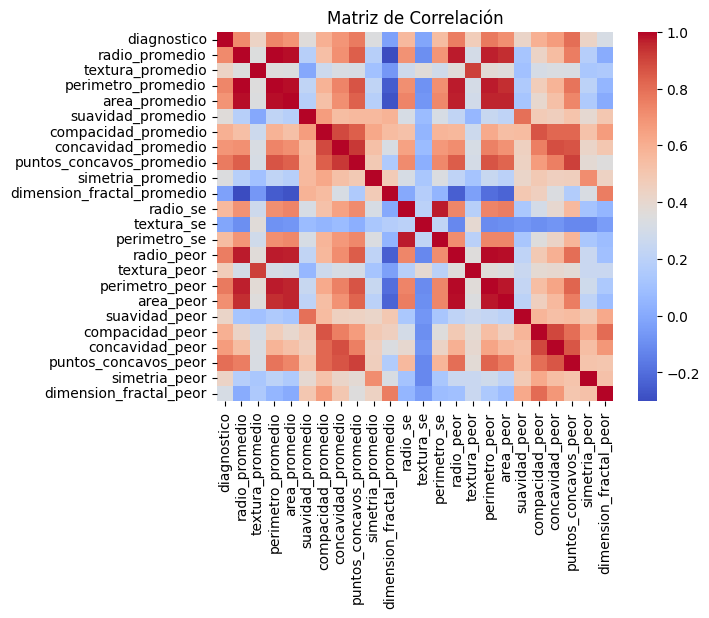

In [175]:
# Evaluar la correlacion entre la columna diagnostico y las variables numericas

# Matriz de correlación
corr_matrix = data_limpia_normalizada.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

Obtener un ranking de la importancia de las caracteristicas con random forest

In [176]:
# dividir el dataset en variables predictoras y variable objetivo
X = data_limpia_normalizada.drop(columns=['diagnostico'])   
y = data_limpia_normalizada['diagnostico']

In [177]:
X.shape, y.shape

((713, 23), (713,))

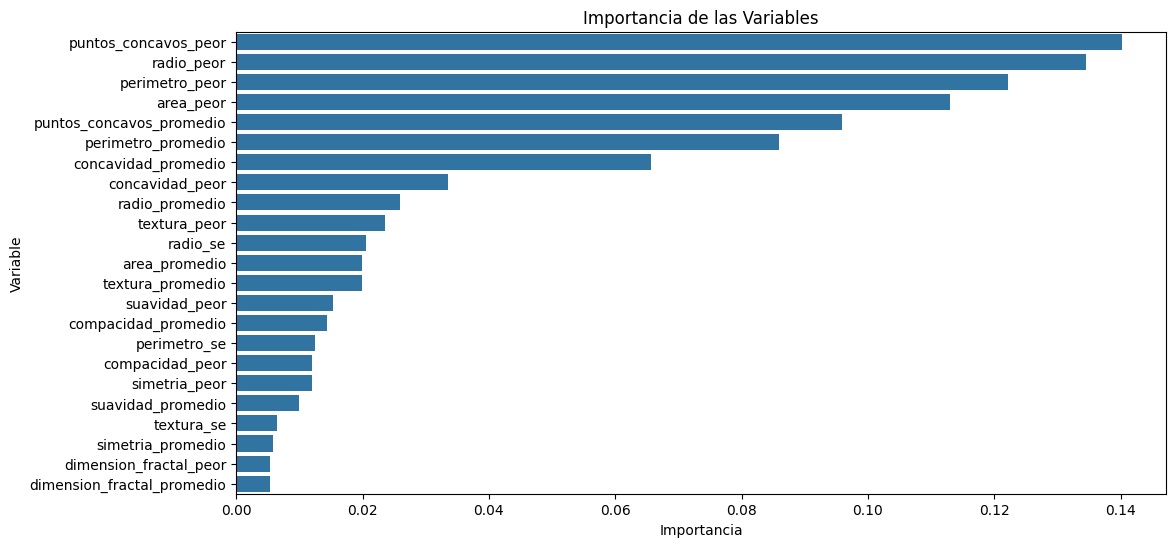

Importancia de características:
                       Variable  Importancia
20        puntos_concavos_peor     0.140203
13                  radio_peor     0.134471
15              perimetro_peor     0.122177
16                   area_peor     0.112990
7     puntos_concavos_promedio     0.095912
2           perimetro_promedio     0.085901
6          concavidad_promedio     0.065622
19             concavidad_peor     0.033597
0               radio_promedio     0.025902
14                textura_peor     0.023540
10                    radio_se     0.020533
3                area_promedio     0.019978
1             textura_promedio     0.019858
17               suavidad_peor     0.015385
5          compacidad_promedio     0.014349
12                perimetro_se     0.012492
18             compacidad_peor     0.012011
21               simetria_peor     0.011942
4            suavidad_promedio     0.009972
11                  textura_se     0.006497
8            simetria_promedio     0.005838

In [178]:
# Obtener un ranking de importancia de las variables
model_rank_importncia = RandomForestClassifier(random_state=42)
model_rank_importncia.fit(X, y)
importance = model_rank_importncia.feature_importances_
nombres_columnas_importantes = X.columns

df_importancia = pd.DataFrame({
    'Variable': nombres_columnas_importantes, 
    'Importancia': importance
})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
# Graficar la importancia de las variables  
plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia) 
plt.title("Importancia de las Variables")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

print("Importancia de características:\n", df_importancia)


Conclusión: se observa que la variable con más importancia es "puntos_concavos_peor", que representa a la concavidad de la celula, seguida de radio y perimetro peor, que son las muestras con valores mayores de radio y perimetro

En el top 5 de las caractertisticas con mayor importancia encontramos los puntos_concavos peor y promedio, que representan las irregularidades de los bordes celulares. Las celulas malignas suelen ser más concavas, por su crecimiento desordenado. El radio, perimetro y área (peor) estan relacionadas con el tamaño y forma celular, se puede denotar que el comportamiento irregular de cancer afecta estos parametros.

# 2. Creación de nuevas  características

La combinación de caracteristicas para buscar parametros podrian ser relaciones geometricas, teniendo en cuenta que las perimetro, area y radio son caracteristicas de importancia, sin embargo estas combinaciones pueden ser ruido o irrelevantes clinicamente, por lo que se decide, hacer una combinación y nuevamente evaluar la importancia de las caracteristicas con Random Forest

In [179]:
data_norm_nuevas_var = data_limpia_normalizada.copy()

In [180]:
data_norm_nuevas_var['relacion_area_radio'] = data_norm_nuevas_var['area_promedio'] / data_norm_nuevas_var['radio_promedio']

In [181]:
print(data_norm_nuevas_var['radio_promedio'].isna().sum())

0


In [182]:
data_norm_nuevas_var['relacion_perimetro_radio'] = data_norm_nuevas_var['perimetro_promedio'] / data_norm_nuevas_var['radio_promedio']

In [183]:
data_norm_nuevas_var['dif_ptsconcavos_promedio_peor'] = data_norm_nuevas_var['puntos_concavos_peor'] - data_norm_nuevas_var['puntos_concavos_promedio'] 

evaluacion de importancia

In [184]:
# dividir el dataset en variables predictoras y variable objetivo
X = data_norm_nuevas_var.drop(columns=['diagnostico'])   
y = data_norm_nuevas_var['diagnostico']

In [185]:
X.shape, y.shape

((713, 26), (713,))

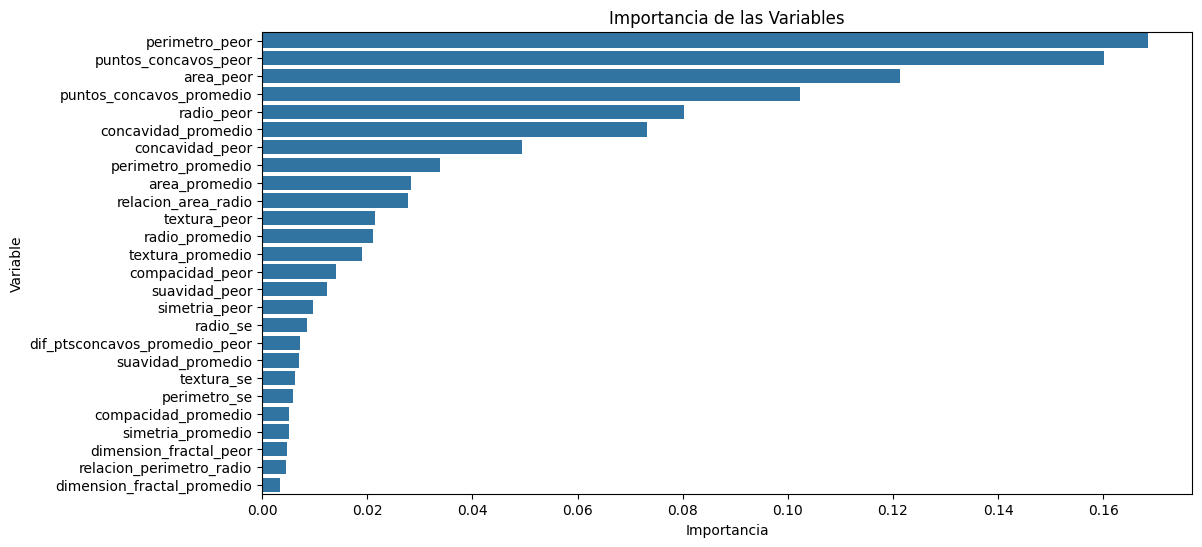

Importancia de características:
                          Variable  Importancia
15                 perimetro_peor     0.168534
20           puntos_concavos_peor     0.160244
16                      area_peor     0.121280
7        puntos_concavos_promedio     0.102395
13                     radio_peor     0.080306
6             concavidad_promedio     0.073256
19                concavidad_peor     0.049370
2              perimetro_promedio     0.033747
3                   area_promedio     0.028379
23            relacion_area_radio     0.027711
14                   textura_peor     0.021372
0                  radio_promedio     0.021075
1                textura_promedio     0.018996
18                compacidad_peor     0.014082
17                  suavidad_peor     0.012320
21                  simetria_peor     0.009634
10                       radio_se     0.008591
25  dif_ptsconcavos_promedio_peor     0.007207
4               suavidad_promedio     0.006989
11                     text

In [186]:
# Obtener un ranking de importancia de las variables
model_rank_importncia = RandomForestClassifier(random_state=42)
model_rank_importncia.fit(X, y)
importance = model_rank_importncia.feature_importances_
nombres_columnas_importantes = X.columns

df_importancia = pd.DataFrame({
    'Variable': nombres_columnas_importantes, 
    'Importancia': importance
})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
# Graficar la importancia de las variables  
plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia) 
plt.title("Importancia de las Variables")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

print("Importancia de características:\n", df_importancia)

De entre las tres columnas que se añadieron, la relacion area radio es la que puede tener una influencia mayor (importancia tras randomforest), esto concuerda con la información de que las celulas tienen un crecimiento anomalo cuando son cancerigenas. 

dif_ptsconcavos_promedio_peor: 0.007471
relacion_perimetro_radio: 0.003368
relacion_area_radio: 0.023810

se procede a hacer un analisis de caracteristicas relevantes antes de decidir si conservar las variables añadidas

# 3. Selecionar las caracteristicas relevantes

## 3.1 Analisis de varianza ANOVA

In [187]:
# Selección de características utilizando SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
X_seleccionadas = selector.fit_transform(X, y)
print("Puntajes de características:", selector.scores_)

# Obtener un array booleano: True si la columna fue seleccionada
mask = selector.get_support()

# Ver los nombres de las columnas seleccionadas
columnas_seleccionadas = X.columns[mask]

print("Columnas seleccionadas:")
print(columnas_seleccionadas)

Puntajes de características: [7.81376935e+02 1.61807574e+02 8.31635977e+02 6.61109692e+02
 1.06054842e+02 3.92330413e+02 6.45132644e+02 9.87486001e+02
 9.35777805e+01 6.56299077e-01 3.23041713e+02 1.40070970e-01
 3.02427740e+02 9.77996599e+02 2.02465269e+02 1.01809269e+03
 7.18773015e+02 1.54063329e+02 3.87118562e+02 5.67987587e+02
 1.23626773e+03 1.60953034e+02 7.89501668e+01 7.96900509e+02
 1.27025596e+02 7.97993143e+01]
Columnas seleccionadas:
Index(['radio_promedio', 'textura_promedio', 'perimetro_promedio',
       'area_promedio', 'suavidad_promedio', 'compacidad_promedio',
       'concavidad_promedio', 'puntos_concavos_promedio', 'simetria_promedio',
       'dimension_fractal_promedio', 'radio_se', 'textura_se', 'perimetro_se',
       'radio_peor', 'textura_peor', 'perimetro_peor', 'area_peor',
       'suavidad_peor', 'compacidad_peor', 'concavidad_peor',
       'puntos_concavos_peor', 'simetria_peor', 'dimension_fractal_peor',
       'relacion_area_radio', 'relacion_perimetro_ra

con esta prueba de anova, las variables añadidas  'relacion_area_radio', 'relacion_perimetro_radio', 'dif_ptsconcavos_promedio_peor' tienen un F bajo, es decir, las características no aporta mucho (las clases tienen medias similares para esa variable). Se decide no incrementar variables 

In [188]:
# dividir el dataset en variables predictoras y variable objetivo
X = data_limpia_normalizada.drop(columns=['diagnostico'])   
y = data_limpia_normalizada['diagnostico']

In [189]:
# Selección de características utilizando SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
X_seleccionadas = selector.fit_transform(X, y)
print("Puntajes de características:", selector.scores_)

# Obtener un array booleano: True si la columna fue seleccionada
mask = selector.get_support()

# Ver los nombres de las columnas seleccionadas
columnas_seleccionadas = X.columns[mask]

print("Columnas seleccionadas:")
print(columnas_seleccionadas)

Puntajes de características: [7.81376935e+02 1.61807574e+02 8.31635977e+02 6.61109692e+02
 1.06054842e+02 3.92330413e+02 6.45132644e+02 9.87486001e+02
 9.35777805e+01 6.56299077e-01 3.23041713e+02 1.40070970e-01
 3.02427740e+02 9.77996599e+02 2.02465269e+02 1.01809269e+03
 7.18773015e+02 1.54063329e+02 3.87118562e+02 5.67987587e+02
 1.23626773e+03 1.60953034e+02 7.89501668e+01]
Columnas seleccionadas:
Index(['radio_promedio', 'textura_promedio', 'perimetro_promedio',
       'area_promedio', 'suavidad_promedio', 'compacidad_promedio',
       'concavidad_promedio', 'puntos_concavos_promedio', 'simetria_promedio',
       'dimension_fractal_promedio', 'radio_se', 'textura_se', 'perimetro_se',
       'radio_peor', 'textura_peor', 'perimetro_peor', 'area_peor',
       'suavidad_peor', 'compacidad_peor', 'concavidad_peor',
       'puntos_concavos_peor', 'simetria_peor', 'dimension_fractal_peor'],
      dtype='object')


In [190]:
# Selección de características utilizando SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_seleccionadas = selector.fit_transform(X, y)
print("Puntajes de características:", selector.scores_)

# Obtener un array booleano: True si la columna fue seleccionada
mask = selector.get_support()

# Ver los nombres de las columnas seleccionadas
columnas_seleccionadas = X.columns[mask]

print("Columnas seleccionadas:")
print(columnas_seleccionadas)

Puntajes de características: [7.81376935e+02 1.61807574e+02 8.31635977e+02 6.61109692e+02
 1.06054842e+02 3.92330413e+02 6.45132644e+02 9.87486001e+02
 9.35777805e+01 6.56299077e-01 3.23041713e+02 1.40070970e-01
 3.02427740e+02 9.77996599e+02 2.02465269e+02 1.01809269e+03
 7.18773015e+02 1.54063329e+02 3.87118562e+02 5.67987587e+02
 1.23626773e+03 1.60953034e+02 7.89501668e+01]
Columnas seleccionadas:
Index(['radio_promedio', 'perimetro_promedio', 'area_promedio',
       'concavidad_promedio', 'puntos_concavos_promedio', 'radio_peor',
       'perimetro_peor', 'area_peor', 'concavidad_peor',
       'puntos_concavos_peor'],
      dtype='object')


## 3.2 Eliminar variables de baja varianza

In [191]:
# Aplicar el selector
selector = VarianceThreshold(threshold=0.01)
X_reducida = selector.fit_transform(X)

# Obtener la máscara booleana: True si fue seleccionada
mask = selector.get_support()

# Columnas seleccionadas
columnas_selecionadas = X.columns[mask]
print("Columnas seleccionadas:")
print(columnas_selecionadas)

# Columnas descartadas
columnas_descartadas = X.columns[~mask]
print("\nColumnas descartadas por baja varianza:")
print(columnas_descartadas)


Columnas seleccionadas:
Index(['radio_promedio', 'textura_promedio', 'perimetro_promedio',
       'area_promedio', 'suavidad_promedio', 'compacidad_promedio',
       'concavidad_promedio', 'puntos_concavos_promedio', 'simetria_promedio',
       'dimension_fractal_promedio', 'radio_se', 'textura_se', 'perimetro_se',
       'radio_peor', 'textura_peor', 'perimetro_peor', 'area_peor',
       'suavidad_peor', 'compacidad_peor', 'concavidad_peor',
       'puntos_concavos_peor', 'simetria_peor', 'dimension_fractal_peor'],
      dtype='object')

Columnas descartadas por baja varianza:
Index([], dtype='object')


Utilizando VarianceThreshold, se pueden observar las columnas que no cambian entre muestra, lo generalmente no aporta nada al modelo. 

Se puede observar que no se descarta ninguna variable por varianza baja

# 4. Guardar archivo final para la etapa de modelado

In [192]:
data_limpia_normalizada.to_csv('../datasets/curated/ml_dataset.csv', index=False)